<a href="https://colab.research.google.com/github/mveer1/google-colab-notebooks/blob/main/DSinPy/Hashing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TO REDUCE SEARCHTIME <br>

key -> hash function -> hash value address (int) <br>

hash fucntion h: Mapping from U to the slots of a hash table T[0....(m-1)] <br> &emsp;&emsp;&emsp;&emsp;    h: U -> {0,1....,m-1}<br>

Direct Address tables: Key k mapped to slot A[k] <br>
Hash Tables: Key k mapped to slot A[h(k)]

Ideal hash function- Whihc perform one to one mapping, are impossible (cant prevent all collisions) <br>
collision resolution techniquea <br>
1. Open Addressing
> Place the colliding key at some empty location inside the hash table itselt <br>
> TO find the empty location inside (each explained later) <br> 
> * Linear Probing 
> * Quadratic Probing
> * Double Hashing
2. Separate Chaining

Hash Functions: <br>

ways to create: <br>
(here all of the keys are assumed to be integers, if they are not then take their ascii value 
1. Truncation (aka extraction, digit selection)
2. Midsquare Method
> Square the keys/ part of the keys and take middle digits as unique addresses
3. Folding Method
*   Shift Folding
> Break the key in groups of size same as required address, add them up and take required digits from it/
*   Boundary Folding
> just reverse all even groups and add them up and take req digits from it/
4. Division Method
> most common <br> (aka modular hasing) <br>
> divide the key by table size, take the remainder as the hash address <br>
>

Lets say, **number of records** - n <br>
**Size of Tabl**e - m <br>
**Load Factor** = n/m <br> 

1. Linear Probing: 
> If h(k) = a, and its already occupied (collision), we'll look at a+1 and so on till end, after that go to 0 <br>
> Now for Retriving, use the hash function for address, if that key is not found at their, search linearly after the hash address. If the search is unsuccesful (i.e. we reached a empty location or arrive where we started), it is not found.  <br>
> H(K, i) = [h(k) + i] mod Tsize, where i goes from 0 to Tsize-1, tsize is tablesize <br>
> * Theres a problem in linear probing: <br>
>> Primary Clustering <br>
>> The bigger the cluster gets, the faster it grows and hence it takes more time for retrival or insertion
2. Quadratic Probing <br>
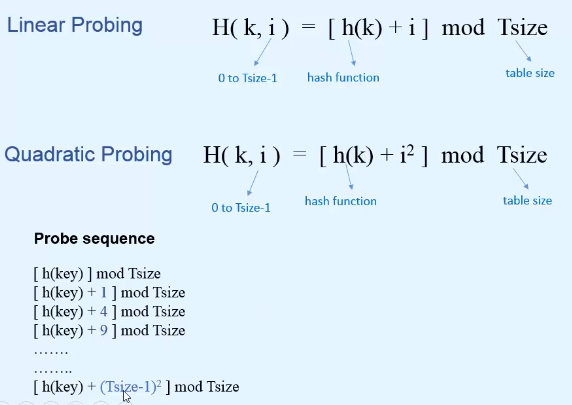


this reduces the formation of clusters <br>
This Creates Secondary Clustering Problem <br>
> Which is because key will follow the same path for a particular hash address because the algo(keep adding 1,4,9..) is same. <br>
> Which results in clusters but the elements of the clusters are at distance of 1,4,9.. <br> 

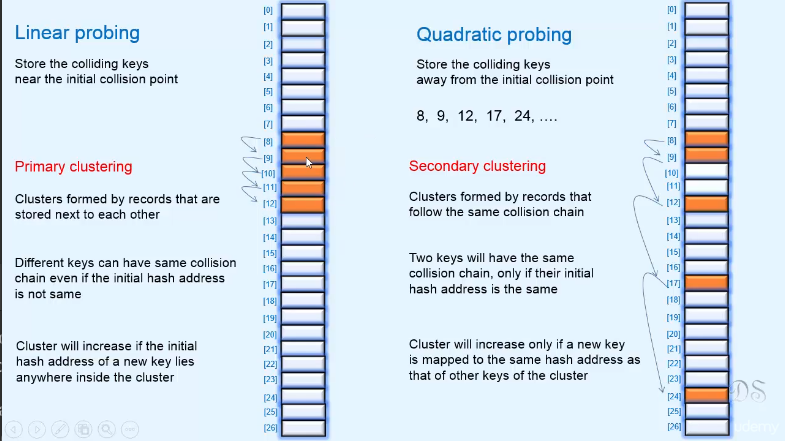

Another problem with Quadratic probing is, insertion could fail even if there are empty locations in the table. <br>
to reduce this problem, take the size of the table to be a prime number, in that case atleast half the table would be filled.<br>

3. Double Hashing 

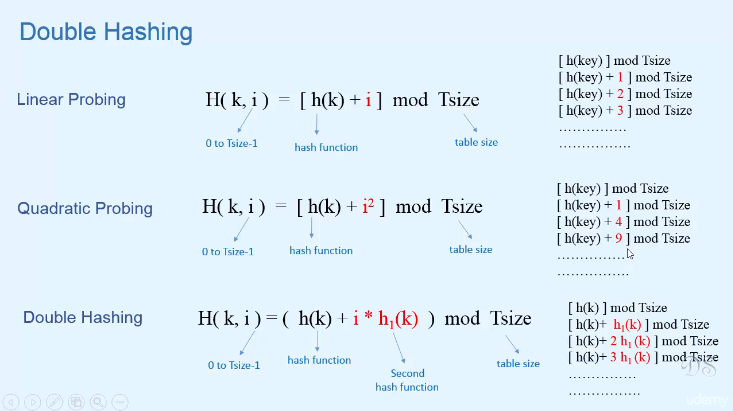

h1 is secondary hash function, it could be, for example, h1(K) = R - (K mod R) 
&emsp;&emsp; R is smaller than Tsize and is Prime <br> Note: mod is % <br> 

Theres no clustering problem in double hashing


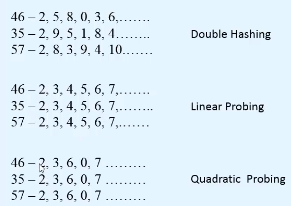

Choice of secondary Hash Functions <br>
1. It should not be the same as the primary hash function 
2. It should never evaluate to zero
3. Value given by secondary hash function should be relatively prime to the table size

In Open Addressing, Load Factor is Always < 1 <br>
When is closes 1, thats when its almost full, searching becomes linear. <br>
the solution here is, rehashing, New Hash Table of Larger Size, and Hash all entries to this new hash table. 


We know how to insert or find a element in a hash table, now Delete:  <br>
lets say we deleted in the middle of a cluster, and we know we stop searching when we reach a empty space, hence this might create problems <br>

We can solve this by adding a status flag for each element, it could be occupied, empty or deleted.<br>

Or we can mark a location as deleted by storing a invalid value for the key, like -1

In [ ]:
class InvalidOperationException(Exception):
    pass


class studentRecord:
    def __init__(self,i,Name):
        self.studentId = i
        self.studentName = Name

    def get_student_id(self):
        return self.studentId
    
    def set_student_id(self,i):
        self.studentId = i
    
    def __str__(self):
        return str(self.studentId) + " " + self.studentName

class HashTable:
    def __init__(self,tableSize=11):
        self.m = tableSize
        self.array = [None] * self.m
        self.n = 0
    
    def hash1(self, key):
        return (key % self.m)
    
    def insert(self, newRecord):                   #linear probing
        key = newRecord.get_student_id()
        h = self.hash1(key)
        location = h
        for i in range(1,self.m):
            if self.array[location] is None or self.array[location].get_student_id() == -1:
                self.array[location] = newRecord
                self.n+=1
                return

        if self.array[location].get_student_id() == key:
            raise InvalidOperationException("Duplicate key")
        
        location = (h + i) % self.m
        print("Table is full : Record can't be inserted ")

    def search(self,key):
        h = self.hash1(key)
        location = h

        for i in range(1,self.m):
            if self.array[location] is None :
                return None
            if self.array[location].get_student_id() == key:
                return self.array[location]
            location = (h + i) % self.m
        return None
    
    def display_table(self):    
        for i in range(self.m):
            print("[",end='');print(i,end='');print("]",end='');
        
            if self.array[i] is not None and self.array[i].get_student_id() != -1:
                print(self.array[i])
            else:
                print("____")

    def delete(self,key):
        h = self.hash1(key)
        location = h
        
        for i in range(1,self.m):
            if self.array[location] is None:
                return None
        
            if self.array[location].get_student_id() == key:
                temp = self.array[location]
                self.array[location].set_student_id(-1)
                self.n -= 1
                return temp
        
            location = (h + i) % self.m
        return None

Collision Resolution Technique
1. Open Addressing
2. Separate Chaining
> Maintain Linked Lists for record mapped to same hash address <br>
> Each Slot -> Refer to a linked list of all records that have same hash value <br>
> Index i -> Refer to the linked list of all records that have hash value i<br>

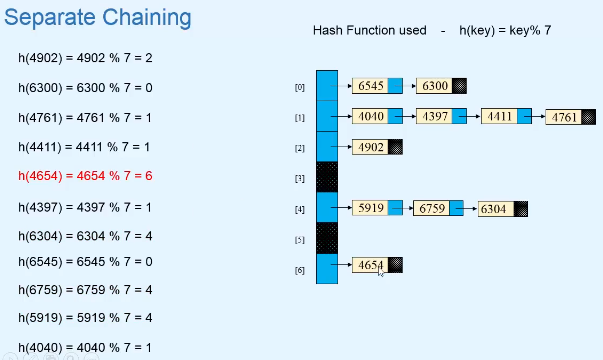

* **Insertion**
> * Get the hash address
> * Inseit in the beginning of the
corresponding linked list
> * O(1)
* **Searching**
> * Get the hash address
> * Search the key in
corresponding linked list
> * O(sizeofll), it is empirically proved that LL lenght is proprotional to the load factor (n/m), avg case O(loadfactor/2)
* **Deletion**
> * Search the key
> * Delete the node holding
the key from the linked list
<br> 
advantages of seperate chaining: <br>
1. Dynamic Situations 
2. Hash Table never overflows
3. Deletion is easy
4. To improve retrieval performance 9 Maintain lists in sorted order
5. Extra space for maintaining linked lists

Table size is a important choice here, cause less size more size of chains(ll) and vice versa <br>
therefore, table size is prefered where loadfactor = 10

In [ ]:
class studentRecord:
    def __init__(self,i,Name):
        self.studentId = i
        self.studentName = Name

    def get_student_id(self):
        return self.studentId
    
    def set_student_id(self,i):
        self.studentId = i
    
    def __str__(self):
        return str(self.studentId) + " " + self.studentName

class Node:
    def __init__(self, value):
        self.info = value
        self.link = None

class SingleLinkedList:
    def __init__(self):
        self.staft = None
      
    def display_list(self):
        if self.start is None:
            print("___")
            return
    
        p = self.start
        while p is not None:
            print(p.info , " ", end=")
            p = p.link
            print()
        
    def search(self,x):
        p = self.start
    
        while p is not None:
            if p.info.get_student_id() == x:
                return p.info
            p = p.link
        else:
            return None
        
    def insert_in_beginning(self, data):
        temp = Node(data)
        temp.link = self.start
        self.start = temp

    def delete_node(self,x):
        if self.start is None:
            print("List is empty")
            return
        
        # Deletion of first node
        if self.start.info.get_student_id() == x:
            self.start = self.start.link
            return
        
        # Deletion in between or at the end
        p = self.start
        while p.link is not None:
            if p.link.info.get_student_id() == x:
                break
            p = p.link
        
        if p.link is None:
            print("Element ", x ,"not in list")
        else:
            p.link = p.link.link


class HashTable:
    def __init__(self,tableSize):
        self.m = tableSize
        self.array = [None] * self.m
        self.n = 0
    
    def hash(self, key):
        return (key % self.m)

    def display_table(self):
        for i in range(self.m):
        print( "[" , i , "] --> ", end ='')
        if self.array[i]!= None:
            self.array[i].display_list()
        else:
            print("___")

    def search(self, key):
        h = self.hash(key)
        if self.array[h] != None:
            return self.array[h].search(key)
        return None

    def insert(self, newRecord):
        key = newRecord.get_student_id()
        h = self.hash(key)
        
        if self.array[h] == None:
            self.array[h] = SingleLinkedList()
        self.array[h].insert_in_beginning(newRecord)
        self.n+=1

    def delete(self, key):
        h = self.hash(key)
        if self.array[h] != None:
            self.array[h].delete_node(key)
            self.n-=1
        else:
            print("Value " , key , " not present")